In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pathlib import Path

In [13]:

# Study data files
age_path = Path("OneDrive/Desktop/Bootcamp_Projects/Project-1/tenzin_test/Resources/experiencing_homelessness_age_demographics.csv")
ethnicity_path = Path("OneDrive/Desktop/Bootcamp_Projects/Project-1/tenzin_test/Resources/experiencing_homelessness_ethnicity_demographics.csv")
gender_path = Path("OneDrive/Desktop/Bootcamp_Projects/Project-1/tenzin_test/Resources/experiencing_homelessness_gender_demographics.csv")

# Read the data 
age = pd.read_csv(age_path)
ethnicity = pd.read_csv(ethnicity_path)
gender = pd.read_csv(gender_path)

#Study the data
age.head()
ethnicity.head()
gender.head()

,CALENDAR_YEAR,COC_ID,COC_NAME,GENDER,EXPERIENCING_HOMELESSNESS_CNT
0,2017,All,California,Female,78453
1,2017,All,California,Male,101150
2,2017,All,California,Non-Singular Gender,137
3,2017,All,California,Questioning Gender,*
4,2017,All,California,Transgender,667


In [9]:
#Checking if there are any null sets.
print(age.count())
print(ethnicity.count())
print(gender.count())

CALENDAR_YEAR                    2141
COC_ID                           2141
COC_NAME                         2141
AGE_GROUP_PUBLIC                 2141
EXPERIENCING_HOMELESSNESS_CNT    2141
dtype: int64
CALENDAR_YEAR                787
COC_ID                       787
COC_NAME                     787
ETHNICITY                    787
EXPERIENCING_HOMELESSNESS    787
dtype: int64
CALENDAR_YEAR                    1234
COC_ID                           1234
COC_NAME                         1234
GENDER                           1234
EXPERIENCING_HOMELESSNESS_CNT    1234
dtype: int64


In [22]:
#Discarding cells with insignificant/dirty value
gender_df= gender[gender["EXPERIENCING_HOMELESSNESS_CNT"] != "*"]
cleaned_df1 = gender_df[gender_df["CALENDAR_YEAR"]==2022]
cleaned_df = cleaned_df1[cleaned_df1["COC_ID"] == "All"]
cleaned_df

,CALENDAR_YEAR,COC_ID,COC_NAME,GENDER,EXPERIENCING_HOMELESSNESS_CNT
998,2022,All,California,Female,133271
999,2022,All,California,Male,175197
1000,2022,All,California,Non-Singular Gender,841
1001,2022,All,California,Questioning Gender,53
1002,2022,All,California,Transgender,1534
1003,2022,All,California,Unknown,5538


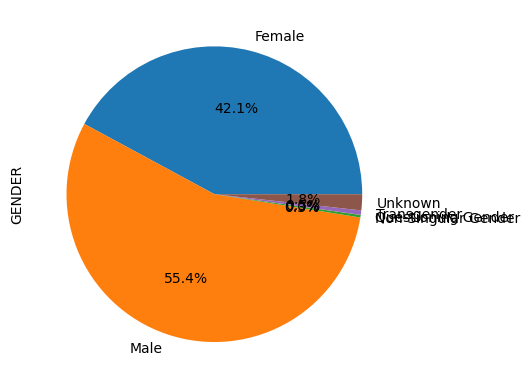

In [28]:

plt.pie(cleaned_df["EXPERIENCING_HOMELESSNESS_CNT"],labels = cleaned_df["GENDER"], autopct ="%1.1f%%")
plt.ylabel("GENDER")
plt.show()

In [38]:
age_df1 = age[age["CALENDAR_YEAR"]==2022]
age_df = age_df1[age_df1["COC_ID"] == "All"]
age_df.sort_values(by = "EXPERIENCING_HOMELESSNESS_CNT",ascending = False)


,CALENDAR_YEAR,COC_ID,COC_NAME,AGE_GROUP_PUBLIC,EXPERIENCING_HOMELESSNESS_CNT
1788,2022,All,California,Under 18,67913
1784,2022,All,California,35-44,55839
1783,2022,All,California,25-34,54477
1785,2022,All,California,45-54,46531
1786,2022,All,California,55-64,44263
1782,2022,All,California,18-24,25046
1787,2022,All,California,65+,18537
1789,2022,All,California,Unknown,11228


In [52]:
age_df["EXPERIENCING_HOMELESSNESS_CNT"]=age_df["EXPERIENCING_HOMELESSNESS_CNT"].astype(int)

C:\Users\tnord\AppData\Local\Temp\ipykernel_2112\609040547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df["EXPERIENCING_HOMELESSNESS_CNT"]=age_df["EXPERIENCING_HOMELESSNESS_CNT"].astype(int)


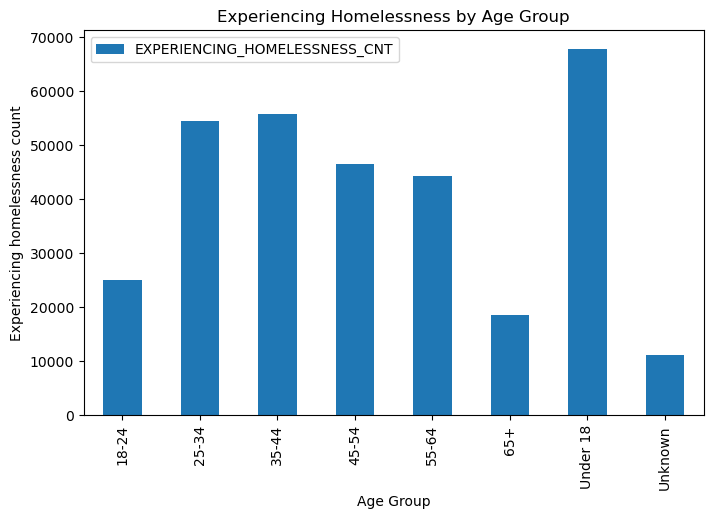

In [53]:
age_group = age_df[["AGE_GROUP_PUBLIC", "EXPERIENCING_HOMELESSNESS_CNT"]]

# Plotting the bar chart
age_group.plot(kind="bar", x="AGE_GROUP_PUBLIC", y="EXPERIENCING_HOMELESSNESS_CNT", figsize=(8, 5))

# Customizing the chart
plt.xlabel("Age Group")
plt.ylabel("Experiencing homelessness count")
plt.title("Experiencing Homelessness by Age Group")

# Display the plot
plt.show()